#**딥러닝 네트워크 학습시키기**

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운
mnist = keras.datasets.mnist

In [4]:
# 데이터(mnist) 로드
(x_train, y_train), (x_test,y_test) = mnist.load_data()

# 데이터 전처리 : 정규화
x_train_norm, x_test_norm = x_train / 255.0, x_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

네트워크 입력 : (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 형태

In [10]:
print(x_train.shape)

print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

# 결과를 확인해보면 채널수가 없다
# 그러므로 수정해줘야함

(60000, 28, 28)
Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)


In [15]:
# 데이터갯수에 -1을 쓰면 reshape시 자동계산됨

x_train_reshaped = x_train_norm.reshape(-1,28,28,1)
x_test_reshaped = x_test_norm.reshape(-1,28,28,1)

In [16]:
print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


###딥러닝 네트워크 학습

epochs = 10
60000개의 데이터를 10번 사용해 학습

In [17]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train_reshaped, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1850 - accuracy: 0.9444
Epoch 2/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0587 - accuracy: 0.9817
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0420 - accuracy: 0.9874
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0327 - accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0264 - accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0222 - accuracy: 0.9929
Epoch 7/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0183 - accuracy: 0.9943
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0155 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0130 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 34s 18m

###테스트 데이터로 성능 확인

In [19]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

# accuracy가 위의 10 epoch의 accuracy보다 낮은 걸로 봐서 시험용 데이터가 더 어려운 것을 알 수 있다

313/313 - 2s - loss: 0.0383 - accuracy: 0.9889 - 2s/epoch - 7ms/step
test_loss: 0.038258034735918045 
test_accuracy: 0.9889000058174133


model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있음

model.predict()의 결과가 벡터로 나오는데 각 0,1,2,3...에 대한 추론 확률임

In [26]:
import random

predicted_result = model.predict(x_test_reshaped)
predicted_labels = np.argmax(predicted_result, axis=1)

idx = random.randint(0,9999)
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [7.6145533e-04 6.4229785e-04 4.8156566e-04 1.5597153e-06 2.6636512e-04
 7.8099542e-03 9.7395205e-01 3.0901377e-09 1.6081369e-02 3.3185288e-06]
model이 추론한 가장 가능성이 높은 결과 :  6
실제 데이터의 라벨 :  6


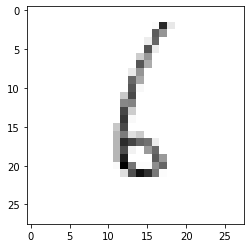

In [27]:
plt.imshow(x_test[idx],cmap = plt.cm.binary)
plt.show()

model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인 가능

예측확률분포: [3.0885677e-17 3.7757584e-09 5.9487029e-14 9.9992001e-01 2.5194627e-15
 7.8903155e-05 3.4048972e-10 5.2807639e-14 1.0738331e-06 1.5999065e-09]
라벨: 5, 예측결과: 3


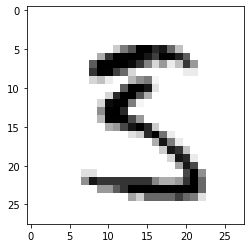

예측확률분포: [7.2993194e-03 5.7136605e-04 3.3877590e-03 5.4114211e-02 6.9845188e-03
 1.2947233e-02 4.6535439e-07 5.2036029e-01 5.0796885e-03 3.8925511e-01]
라벨: 9, 예측결과: 7


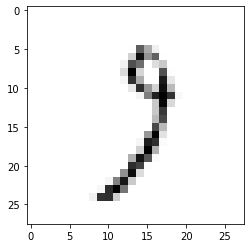

예측확률분포: [4.8758282e-04 1.1994414e-05 7.9715165e-04 1.4888655e-04 3.3174493e-04
 9.0825766e-01 2.1343496e-02 9.5185749e-07 6.8455786e-02 1.6461452e-04]
라벨: 8, 예측결과: 5


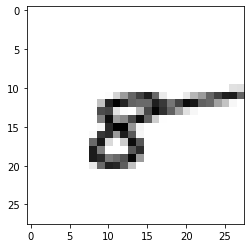

예측확률분포: [9.4947271e-13 4.1648196e-08 4.5623581e-04 1.0445182e-07 5.9846826e-07
 3.1680691e-13 1.0872166e-12 9.9946731e-01 7.5760981e-05 1.8755830e-10]
라벨: 8, 예측결과: 7


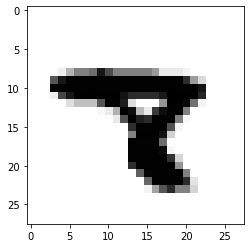

예측확률분포: [1.20398660e-08 1.52418721e-07 1.55653320e-11 2.80031243e-09
 1.78329573e-10 6.41061604e-01 1.37233406e-01 1.49451531e-15
 2.21693859e-01 1.09377725e-05]
라벨: 6, 예측결과: 5


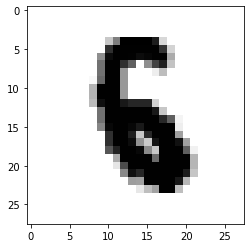

In [28]:
import random

wrong_predict_list = []

for i,_ in enumerate(predicted_labels):
  if predicted_labels[i] != y_test[i]:
    wrong_predict_list.append(i)

samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

###더 나은 네트워크를 만드는 방법은?

3번째 스텝 딥러닝 네트워크 설계하기에서 살펴본 하이퍼파라미터들을 바꾸어 보는 것. Conv2D 레이어에서 입력 이미지의 특징 수를 늘리거나 줄여 보거나, Dense 레이어에서 뉴런수를 바꾸어 보거나, 학습 반복 횟수인 epoch 값을 변경하는 것

In [29]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               